# PCA
PCA can take data with a lot of features and reduce the number of features without losing key information. It is commonly used in visualizing data and data compressioin

## PCA algorithm
PCA algorithm finds new axis that can represent multiple features at the same time to reduce the number of features while ignoring the features that does not vary significantly

1. Preproccess the features
    * Normalize the data to have zero mean
    * Perform feature scaling if the data takes a wide range of values
2. Choose an axis
    * Find the principal component of the data, which is the axis that maximize the variance of the projection of data points (minimize the perpendicular distance from data points to the priciple component axis)
    
Larger variance means more information is captured

## Coordinate on the principal component axis
If the original data point with $n$ features is represented by a $n$ dimensional vector, $\vec x$, and the principal component axis has a unit vector, $\vec u$, the coordinate of the projection of $\vec x$ on the principal component axis is $\vec x \cdot \vec u$

## Reconstruction
Reconstruction allows can approximately find the original data point

If the coordinate of a data point in pricipal component basis is $x$ and the principal component axis has a unit vector, $\vec u$, the original coordiante is approximately $x \vec u$

If the number of principal component is smaller than the orignial dimension of the data (number of features), the lost information cannot be reconstructed

# Code

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

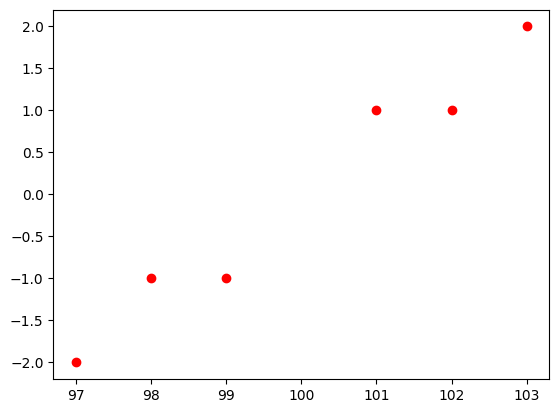

In [4]:
# Construct test example
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

plt.plot(X[:,0], X[:,1], 'ro')

In [6]:
# Use sklearn to load PCA algorithm

# n_components tells the algorithm how many axis are we having
pca = PCA(n_components = 2)

# Fitting axis to the data. The fit function will automatically normalize the data
pca.fit(X)

PCA(n_components=2)

In [8]:
# explained_variance_ratio_ shows how much information is captured by each principal component 
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [12]:
# Perform change of basis by changing from standard basis to the basis made by pricipal components
X_trans = pca.transform(X)

# X_trans stores the coordinate of each data point in the new basis (the new coordinate can be in a lower dimensionaln space)
X_trans

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

In [14]:
# Reconstruction
X_reduced = pca.inverse_transform(X_trans)
X_reduced

# Same n_components as the number of features allows to retain full information

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

In [19]:
# The case when the dimension is reduced 
pca_1 = PCA(n_components = 1)
pca_1.fit(X)
pca_1.explained_variance_ratio_ # Only obtain 99.2% of the original information

array([0.99244289])

In [22]:
# Only has 1 principal component
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

In [27]:
# Some information is lost when reconstructing
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])